In [12]:
import pandas as pd
import numpy as np
from itertools import *
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import re
import string
import unidecode
from sklearn.decomposition import NMF
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction import text 
import re

In [2]:
topics_keyterms = pd.read_csv('topics_keyterms.csv')

In [3]:
topics = topics_keyterms.transpose()

In [4]:
topics.columns = topics.ix[0]

In [5]:
topics = topics.ix[1:]

In [6]:
hilary_com_count = pd.read_csv('data/hilary_com_count.csv')
x = topics[['hilary_pos', 'hilary_neg']].reset_index()

In [7]:
hilary_topics = pd.concat([x, hilary_com_count], axis = 1)
hilary_topics.head()
hilary_topics.drop('Unnamed: 0', axis =1, inplace=True)
hilary_topics.to_csv('data/hilary_topics.csv')

In [47]:
hilary_topics['pos_percent'] = hilary_topics['Pos_num']/hilary_topics['Pos_num'].sum()
hilary_topics['pos_percent']
hilary_topics['neg_percent'] = hilary_topics['Neg_num']/hilary_topics['Neg_num'].sum()
hilary_topics['neg_percent']

0    0.075912
1    0.100730
2    0.062044
3    0.044526
4    0.200000
5    0.151825
6    0.026277
7    0.093431
8    0.086861
9    0.158394
Name: neg_percent, dtype: float64

In [31]:
def add_newline(text):
    text = text.replace("Ms. ", "")
    text = text.replace("Mrs. ", "")
    text = text.replace("Mr. ", "")
    text = unicode(text, 'utf-8')
    text = text.encode('ascii', 'ignore')

    def Sentences(text):
        sentenceEnders = re.compile('[.!?]')
        sentenceList = sentenceEnders.split(text)
        return sentenceList
    
    content = Sentences(text)[:3]
    new = "<br>".join(content)
    new = re.sub('<br> ', '<br>', new)
    
    return new

In [33]:
hilary_topics['hilary_pos_ex1'] = hilary_topics['hilary_pos_ex'].apply(lambda x: add_newline(x))
hilary_topics['hilary_neg_ex1'] = hilary_topics['hilary_neg_ex'].apply(lambda x: add_newline(x))


In [49]:
hilary_topics['hilary_pos'].values

array([ 'win election democratic nomination party general vote democrats think clinton',
       'email server private state information classified government emails use secretary',
       'president hillary woman america rodham united states qualified ms clinton',
       'mrs mr clinton republican good party obama position wehner republicans',
       'biden joe run president clinton better race presidency vp man',
       'times story coverage nyt news ny reporting page clinton readers',
       'trump republican bush donald gop clinton hillary candidates like fiorina',
       'hilary bernie win joe hiding like run left wow better',
       'sanders bernie hillary support clinton media candidate campaign socialist need',
       'change people just black don like blm lives want know'], dtype=object)

In [21]:
import plotly.tools as tls
tls.set_credentials_file(username="pfan",
                             api_key="nvzyukyl5g")
credentials = tls.get_credentials_file()

import plotly.plotly as py
from plotly.graph_objs import *

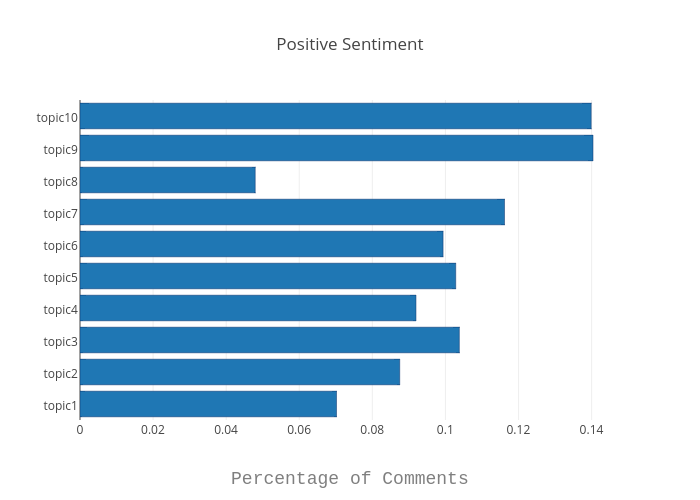

In [45]:
data = Data([
    Bar(
        y=hilary_topics['index'],
        x=hilary_topics['pos_percent'],
        text=hilary_topics['hilary_pos_ex1'],
        orientation = 'h',
        marker=Marker(
        opacity=0.6,
        line=Line(
            color='rgb(8,48,107)',
            width=0.5,
        )
    )
)
    
])
layout = Layout(
    title='Positive Sentiment',
    xaxis=XAxis(
        title='Percentage of Comments',
        titlefont=Font(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=YAxis(
        title='',
        titlefont=Font(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = Figure(data=data, layout=layout)
py.iplot(fig, validate=False, filename='hilary_pos')

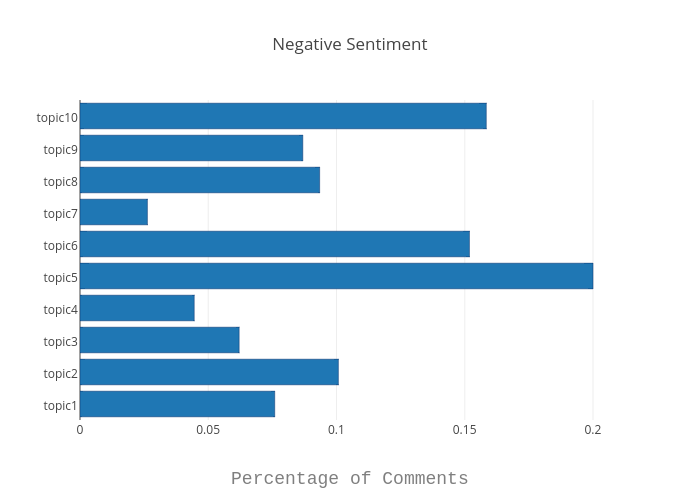

In [48]:
data = Data([
    Bar(
        y=hilary_topics['index'],
        x=hilary_topics['neg_percent'],
        text=hilary_topics['hilary_neg_ex1'],
        orientation = 'h',
        marker=Marker(
        opacity=0.6,
        line=Line(
            color='rgb(8,48,107)',
            width=0.5,
        )
    )
)
    
])
layout = Layout(
    title='Negative Sentiment',
    xaxis=XAxis(
        title='Percentage of Comments',
        titlefont=Font(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=YAxis(
        title='',
        titlefont=Font(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = Figure(data=data, layout=layout)
py.iplot(fig, validate=False, filename='hilary_neg')